In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\hi\Documents\NLP\Time_Series_Analysis\Data_Sets\wp_log_peyton_manning.csv')

In [3]:
df['ds']= pd.to_datetime(df['ds'])

df.set_index('ds', inplace=True)

print(df.head())

                   y
ds                  
2007-12-10  9.590761
2007-12-11  8.519590
2007-12-12  8.183677
2007-12-13  8.072467
2007-12-14  7.893572


###pip uninstall matplotlib matplotlib-inline -y
###pip install matplotlib==3.7.2 matplotlib-inline==0.1.6

(array([13514., 13879., 14245., 14610., 14975., 15340., 15706., 16071.,
        16436., 16801.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

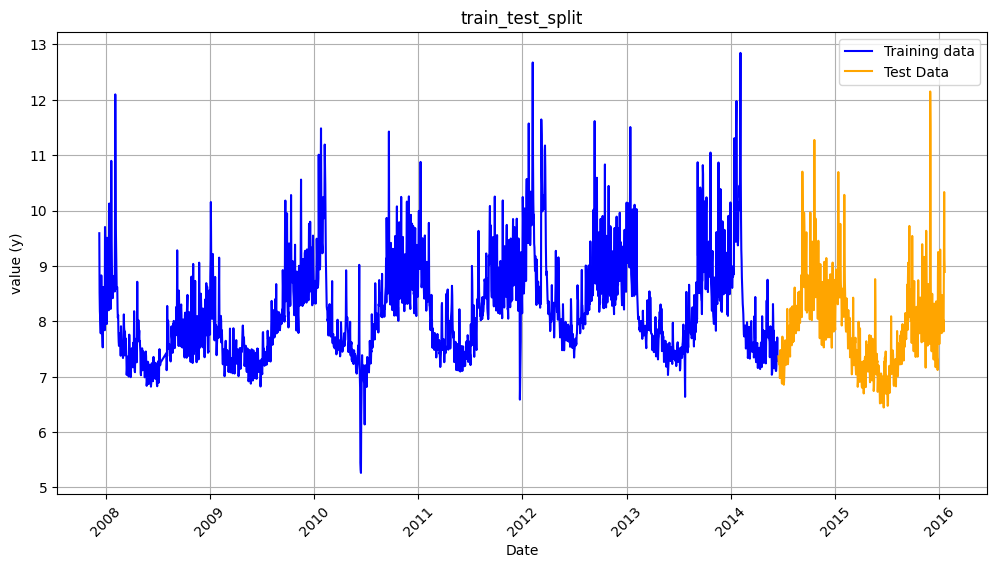

In [7]:
#spit the data into taining and testing sets based on data
train_size = int(len(df)*0.8)  #80% for taining
train , test = df[:train_size],df[train_size:]

#plot the training and testing sets
plt.figure(figsize=(12,6))
plt.plot(train.index , train['y'], label='Training data' , color='blue')
plt.plot(test.index, test['y'] , label='Test Data' , color='orange')
plt.title('train_test_split')
plt.xlabel('Date')
plt.ylabel('value (y)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

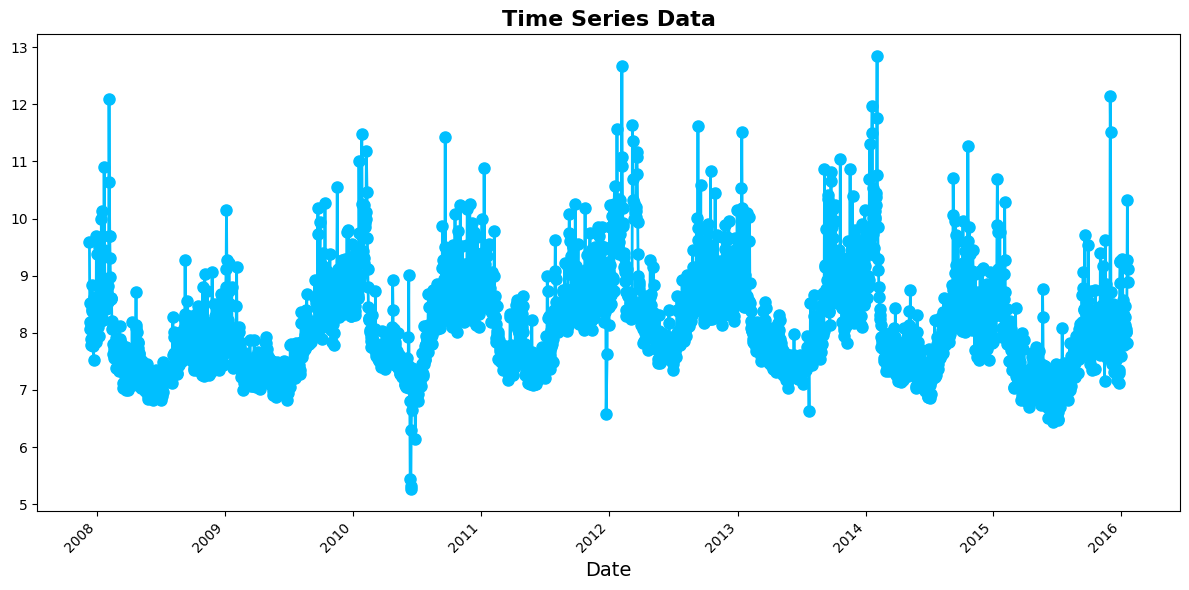

In [8]:
#plot the time series data with enhanced aesthetics
plt.figure(figsize=(12,6))
plt.plot(df.index,df['y'] , marker='o' ,linestyle ='-' , color='deepskyblue',markersize=8,linewidth=2)
plt.title('Time Series Data' , fontsize=16, weight='bold')
plt.xlabel('Date' , fontsize=14)
plt.xticks(rotation=45 , ha='right')
plt.tight_layout()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['y'])
print('ADF Statistic:',result[0])
print('p-vlaue',result[1])

if result[1]<0.05:
    print("the time series is likely to stastionary")
else:
    print("The time series is likely non statinory.diffrence may required")

ADF Statistic: -4.483386923101623
p-vlaue 0.00021068770095050005
the time series is likely to stastionary


<Figure size 1200x800 with 0 Axes>

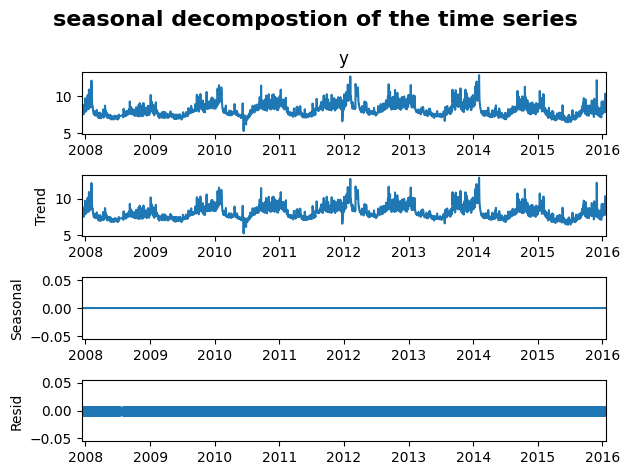

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

#decompose the time series with enhanced visuals
decomposition = seasonal_decompose(df['y'], model='additive' , period=1)
plt.figure(figsize=(12,8))
decomposition.plot()
plt.suptitle('seasonal decompostion of the time series', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

c:\Users\hi\Documents\NLP\Time_Series_Analysis\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hi\Documents\NLP\Time_Series_Analysis\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hi\Documents\NLP\Time_Series_Analysis\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2324
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1394.141
Date:                Mon, 05 Jan 2026   AIC                           2794.282
Time:                        16:26:25   BIC                           2811.533
Sample:                             0   HQIC                          2800.568
                               - 2324                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5139      0.021     24.178      0.000       0.472       0.556
ma.L1         -0.8855      0.014    -63.805      0.000      -0.913      -0.858
sigma2         0.1944      0.003     67.798      0.0

c:\Users\hi\Documents\NLP\Time_Series_Analysis\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


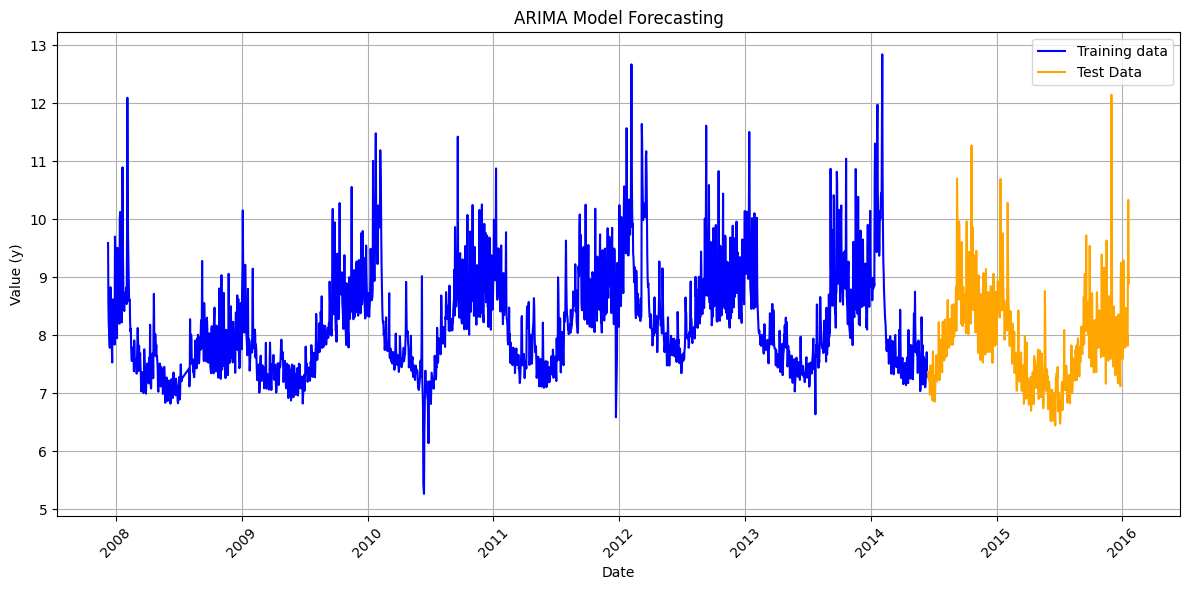

In [14]:
#fit ARIMA model on the training data
model = ARIMA(train['y'], order=(1,1,1))
model_fit = model.fit()

#print ARIMA model summary
print(model_fit.summary())

#forecast for the test period
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

#plot the forecast
plt.figure(figsize=(12,6))
plt.plot(train.index , train['y'], label ='Training data' , color='blue')
plt.plot(test.index , test['y'], label ='Test Data' , color='orange')
plt.title('ARIMA Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Value (y)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()